# <span style="color:red">VBMicrolensing</span>

# Head

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib.lines import Line2D
import VBMicrolensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

# Initialize

In [12]:
# Initialize VBMicrolensing() class object
VBM = VBMicrolensing.VBMicrolensing()
#Set relative accuracy
VBM.RelTol = 1e-03
#Set accuracy
VBM.Tol=1e-03

# Light Curve

In [13]:
# Separation between the first two lenses in descending order of mass in units of total ang. Einstein radii
s12 = 0.765

# Mass ratio lens 2
q2 = 0.00066

# impact parameter
u0 = 0.0060

# alpha
alpha= 3.212

# source radius in Einstein radii of the total mass.
rho = 0.0567

# einstein radius crossing time
tE = 50.13

# time of peak magnification
t0 = 0

#separation between the last two lenses in descending order of mass in units of total ang. Einstein radii
s23=1.5

# Mass ratio lens 3
q3=0.000001

# psi
psi=-1.5


num_points = 1000
tmin = -50
tmax = 50
t = np.linspace(t0 + tmin, t0 + tmax, num_points)

params = [np.log(s12), np.log(q2), u0, alpha, np.log(rho), np.log(tE), t0, np.log(s23), np.log(q3), psi]

# Set the Method that you want use : Singlepoly, Multipoly, Nopoly.
VBM.SetMethod(VBM.Method.Nopoly)

magtriple = VBM.TripleLightCurve(params, t)

# Caustic curves

In [14]:
# Calculate the cirtical curves and the caustic curves
caustics = VBM.Multicaustics()

# Plot

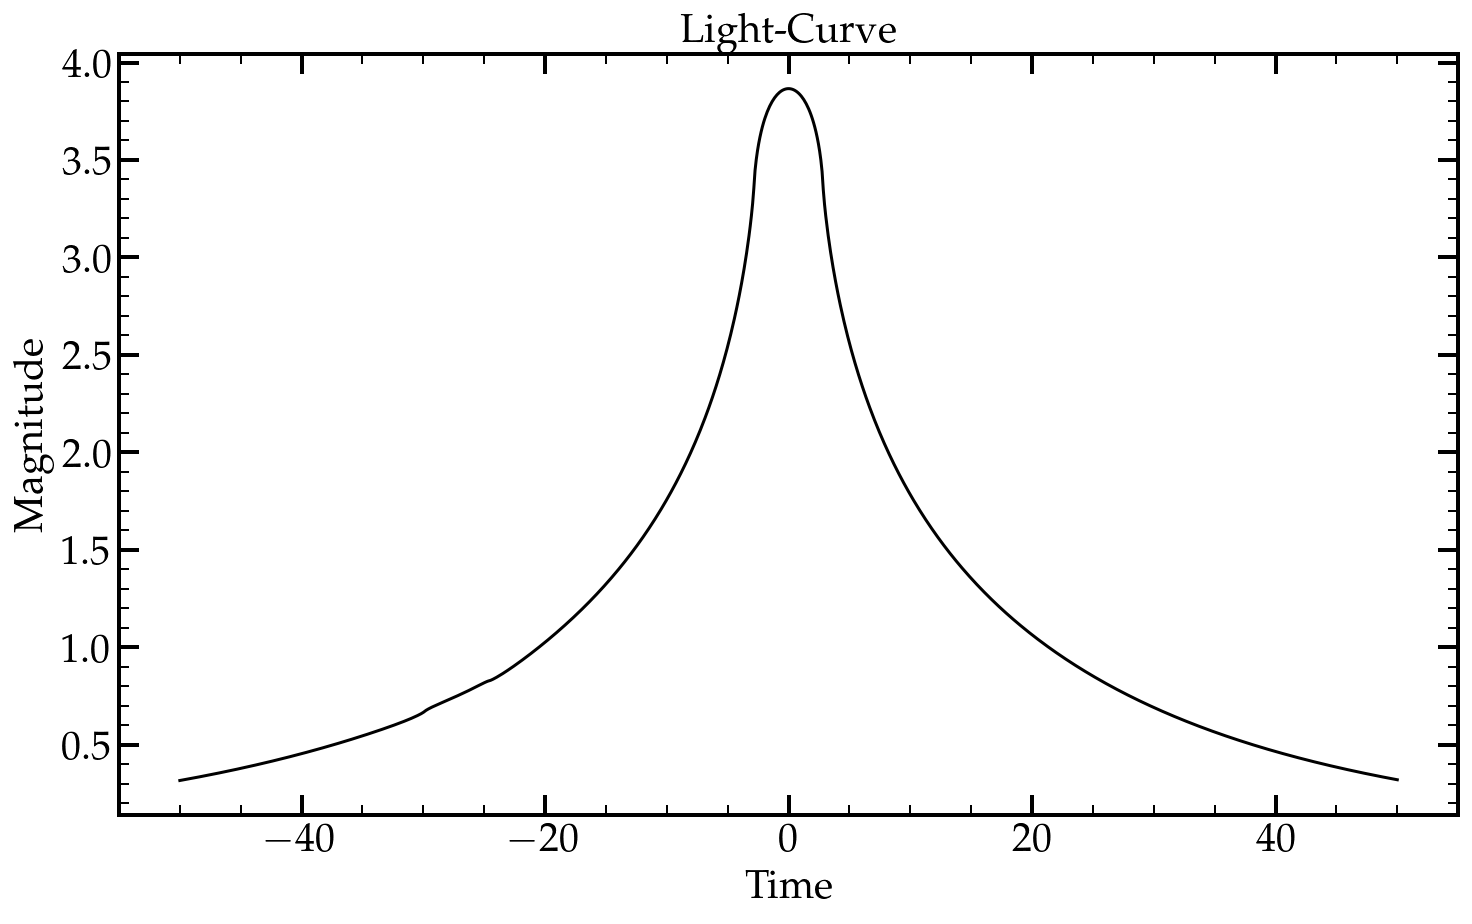

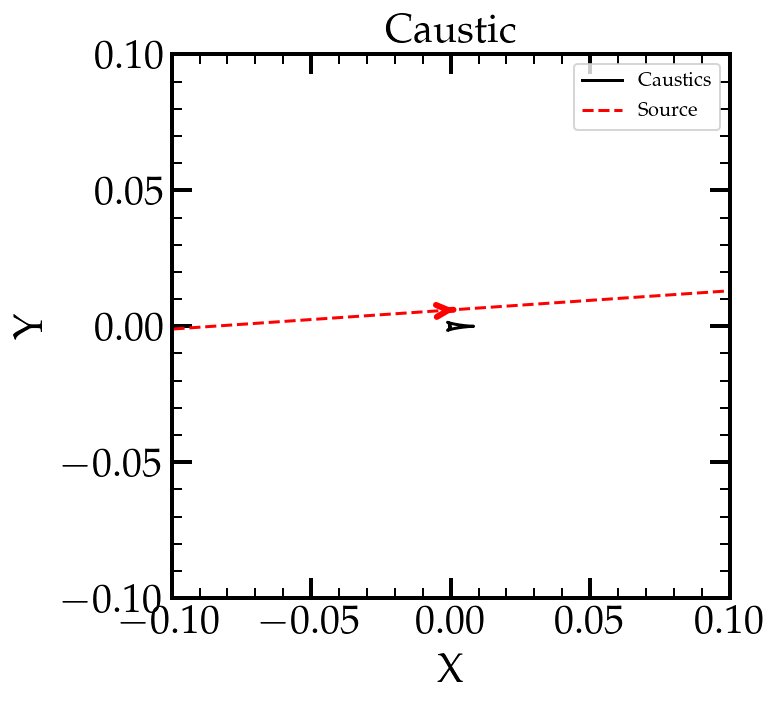

In [15]:
# LIGHT CURVE plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(t, 2.5*np.log10(magtriple[0]), 'k-')
ax.set_title('Light-Curve')
ax.set_xlabel('Time')
ax.set_ylabel('Magnitude')
ax.minorticks_on()  # Aggiungi tick minori

ax.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax.spines.values():
    spine.set_linewidth(2)

# CAUSTICS plot
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(111)

first_plot = True
for cau in caustics:
    if first_plot:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1, label='Caustics')
        first_plot = False
    else:
        ax2.plot(cau[0], cau[1], 'k-', markersize=0.1)
        
ax2.plot(magtriple[1], magtriple[2], 'r--', label='Source')

mid_x = np.mean(magtriple[1])
mid_y = np.mean(magtriple[2])
delta_x = magtriple[1][-1] - magtriple[1][0]
delta_y = magtriple[2][-1] - magtriple[2][0]
arrow_end_x = mid_x + delta_x * 0.001
arrow_end_y = mid_y + delta_y * 0.001
ax2.annotate('', xy=(arrow_end_x, arrow_end_y), xytext=(mid_x, mid_y),
             arrowprops=dict(arrowstyle='->', color='red', mutation_scale=15, linestyle='-', linewidth=3))

ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.set_title('Caustic')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.minorticks_on()  
ax2.legend()

ax2.tick_params(axis='both', which='major', width=2, length=10, direction='in', bottom=True, top=True, left=True, right=True)
ax2.tick_params(axis='both', which='minor', width=1, length=5, direction='in', bottom=True, top=True, left=True, right=True)

for spine in ax2.spines.values():
    spine.set_linewidth(2)

plt.show()